In [2]:
import pandas as pd 

import psana as ps
import numpy as np
import math 
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial as npply
import sys
import os
import h5py
import scipy.stats as st
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter as gf
from sklearn.utils import resample
sys.path.append('/reg/data/ana16/rix/rixlv1519/results/LCLS_LV15_2021/TestCode/EarlyScience/AnalyzeH5/')
from chemRIXSAnalysis import *
from ChemRIXSClasses import *
from filterTools import *
sys.path.append('/reg/data/ana16/rix/rixlv1519/results/LCLS_LV15_2021/Functions/')
from Functions import *
from Load_Scans import *
from raw_data_class import RawData as RDC
from pro_data_class import ProData as PDC
%matplotlib notebook


font = {'size'   : 16}
mpl.rc('font', **font)
%matplotlib widget
cmap = plt.cm.get_cmap('terrain').reversed()

In [8]:
# print(list(raw))
# print((raw['andor_dir']['full_area']).shape)

# keys = raw['hsd']['full_hsd_1']

['Sums', 'UserDataCfg', 'andor_dir', 'ebeam', 'epicsAll', 'gmd', 'hsd', 'lightStatus', 'mono_encoder', 'rix_fim0', 'rix_fim0_raw', 'rix_fim1', 'rix_fim1_raw', 'rix_fim2', 'rix_fim2_raw', 'timestamp', 'timing', 'tt', 'xgmd']
(50531, 2048)


Next steps:

Calibrate from mono_encoder to mono_eV

Figure out how to deal with the weird jump at the beginning of mono scans. (look at distribution and then select range before binning maybe?)

Bin shots every 0.2 eV.

Separate into laser on vs laser off. 

Bin laser on into time bins.

Filter things here?




In [3]:
exp = 'rixlv1519'
small_data_folder = '/reg/data/ana01/rix/%s/hdf5/smalldata/' % exp #changeme
scans = [78]
raw = h5py.File(small_data_folder+'%s_Run%04d.h5' % (exp,scans[0]))

In [23]:
region = [1,2]
test = np.zeros((raw['hsd']['full_hsd_1'].shape[0],region[1]-region[0]))
for i in range(0,raw['hsd']['full_hsd_1'].shape[0]):
    test[i,:]=np.array(raw['hsd']['full_hsd_1'][i,region[0]:region[1]])
# np.array(raw['hsd']['full_hsd_1'][i,1000:2000])
test.shape

KeyboardInterrupt: 

In [22]:
region = [1000,2000]
test = np.zeros((raw['hsd']['full_hsd_1'].shape[0],region[1]-region[0]))
for i in range(0,raw['hsd']['full_hsd_1'].shape[0]):
    test[i,:]=np.array(raw['hsd']['full_hsd_1'][i,region[0]:region[1]])
# np.array(raw['hsd']['full_hsd_1'][i,1000:2000])
test.shape

(50531, 1000)

<IPython.core.display.Javascript object>


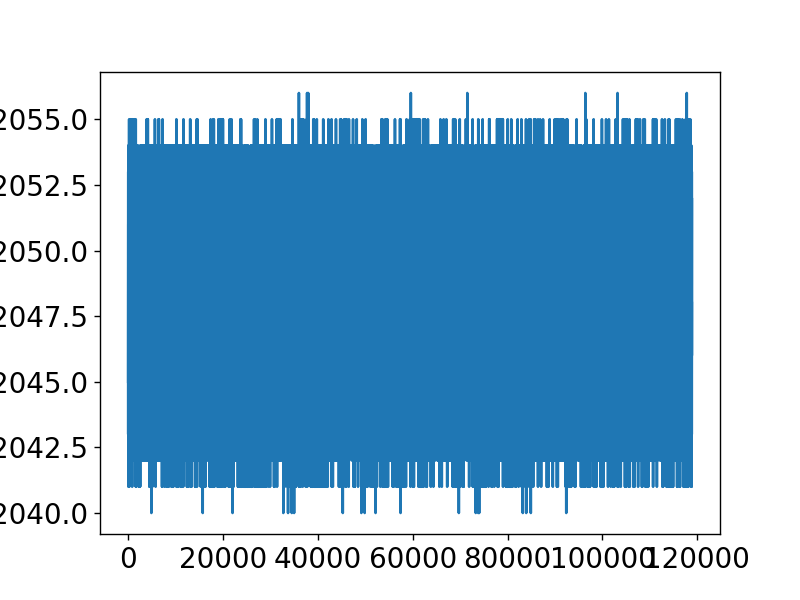

In [10]:
# shape = raw['hsd']['full_hsd_1'][2000].shape[0]
# x = np.arange(shape)
# # a = np.unique(first_shot)

# baselines = np.asarray(raw['hsd']['full_hsd_1'][])

# baselines = np.asarray([fim_raw[:,baseline_roi]])
# baselines = np.mean(baselines)
                        
# peak_values = np.zeros(2)

# shape = (raw['hsd']['full_hsd_1'][0].shape
# for i in range(shape[0]):
#     if raw['hsd']['full_hsd_1'][0][i] < (baselines+5):
#         continue
#     else:
#         peak_values[0] = i - 2000
#         break

# for i in range(peak_range[0],shape[0]):
#     if raw['hsd']['full_hsd_1'][0][i] > (baselines-5):
#         continue
#     else:
#         peak_values[1] = i + 2000 
#         break

# signal_rois = np.arange(peak_values[0],peak_values[1])
         
# peak_range = peak_range[1] - peak_range[0]
         
# specs = np.asarray([fim_raw[:,signal_roi]])
         
# intensities = np.zeros(shape[0],len(signal_rois))
# for i in range (peak_range):
#     intensities[:,i] =specs[:,i]-baselines[i,np.newaxis()]
    
                        

y= raw['hsd']['full_hsd_1'][13000]
plt.figure()
plt.plot(x,y)


In [4]:
raw_datas = []
for scan in scans:
    raw_data = load_scans(small_data_folder,exp,scan)
    
    I0_intensities_fim0, I0_specs_fim0, baselines_fim0 = \
    process_fim(raw_data.fim0_raw,np.arange(0,8),np.arange(0,50),np.arange(103,112))
    
    I0_intensities_fim1, I0_specs_fim1, baselines_fim1 = \
    process_fim(raw_data.fim1_raw,np.arange(0,8),np.arange(0,50),np.arange(103,112))
             
    intensities_fim2=process_fim_2(raw_data.fim2_raw,np.arange(0,8))
    
    andor_dir_intensities, andor_dir_specs, baseline_andor_dir = \
    process_andor(raw_data.andor_dir_raw,np.arange(500,800),np.arange(900,1250))
    
#     if raw_data.laser == 1:
#         r = []
        
#     if raw_data.laser == 0:
#         r = []

    raw_data.changeValue(I0_intensities_fim0=I0_intensities_fim0,
                        I0_specs_fim0=I0_specs_fim0,
                        baselines_fim0=baselines_fim0,
                        I0_intensities_fim1=I0_intensities_fim1,
                        I0_specs_fim1=I0_specs_fim1,
                        baselines_fim1=baselines_fim1,
                        intensities_fim2=intensities_fim2,
                        andor_dir_intensities=andor_dir_intensities,
                        andor_dir_specs=andor_dir_specs,
                        baseline_andor_dir=baseline_andor_dir
                        )
    
    
    raw_datas = raw_datas + [raw_data]
print(raw_datas[0].getKeys())

generating mono_encoder_ev
loading TT
loading fim0
loading fim1
loading andor
loading fim2
dict_keys(['events', 'xgmd', 'gmd', 'energy_raw', 'mono_encoder', 'pitch_raw', 'horz_raw', 'evrs', 'lxt', 'laser', 'nan_cond', 'mono_encoder_ev', 'tt_pos', 'tt_posps', 'tt_posfwhm', 'fim0_raw', 'fim1_raw', 'andor_dir_raw', 'fim2_raw', 'I0_intensities_fim0', 'I0_specs_fim0', 'baselines_fim0', 'I0_intensities_fim1', 'I0_specs_fim1', 'baselines_fim1', 'intensities_fim2', 'andor_dir_intensities', 'andor_dir_specs', 'baseline_andor_dir'])


<IPython.core.display.Javascript object>


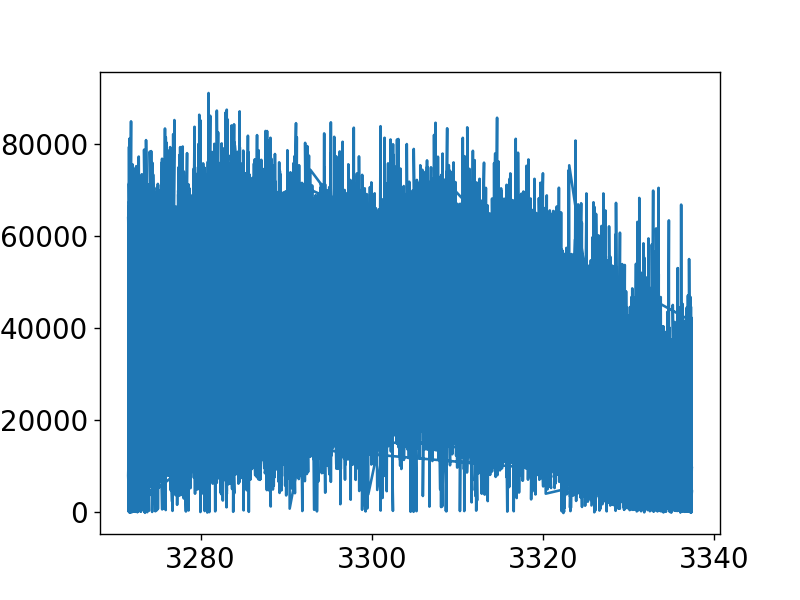

In [6]:
plt.figure()
plt.plot(raw_datas[0].mono_encoder,raw_datas[0].I0_intensities_fim0[7,:])


<IPython.core.display.Javascript object>


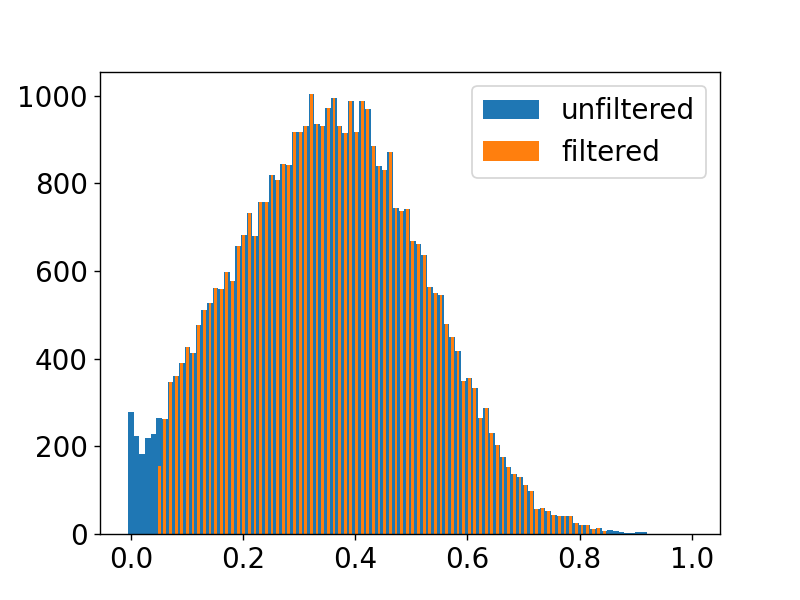

<IPython.core.display.Javascript object>


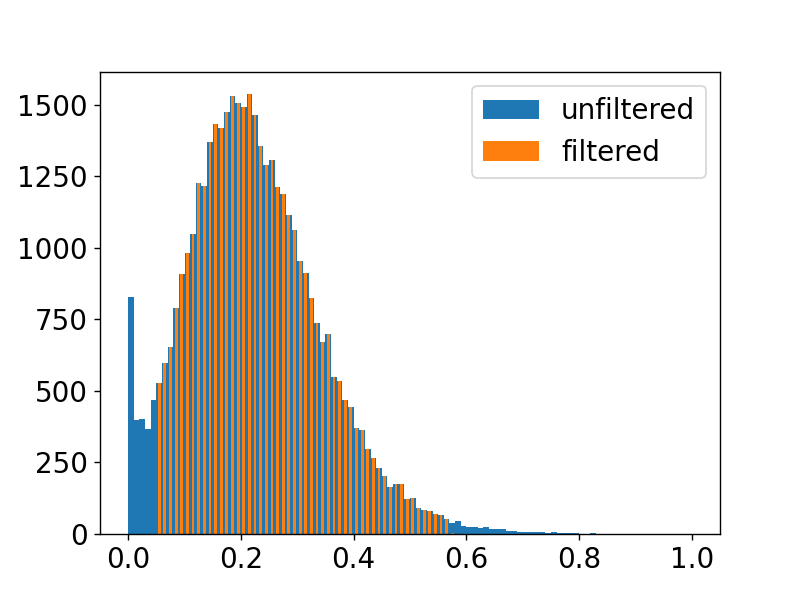

IndexError: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 39356

In [12]:
# plt.close('all')
scans_to_plot = [0]
n_bins = 80
start_bin = 3295
# plt.figure()
to_average = []
fim0_channels = [4,5,6,7]#,5,6,7]#,5,6,7]
fim1_channels = [7]

for scan in scans_to_plot:
    all_events = raw_datas[scan].events    
    x_axis = raw_datas[scan].lxt
    andor = raw_datas[scan].andor_dir_intensities
    
    
    fim_0 = np.sum(raw_datas[scan].I0_intensities_fim0[fim0_channels,:],0)
    fim_1 = np.sum(raw_datas[scan].I0_intensities_fim1[fim1_channels,:],0)
    
    all_Izero = fim_0
#     all_Izero = fim_1
#     all_Izero = np.sum(np.array((fim_0,fim_1)),0)
    
#     fim_0 = raw_datas[scan].I0_intensities_fim1[7,:]


    B_condition_1 = bounds_filter(all_Izero/np.max(all_Izero)\
                                        ,[[0.05,'None'],[3]],True) 
    B_condition_2 = bounds_filter(andor/np.max(andor)\
                                        ,[[0.05,'None'],[3]],True) 
    bounds_conditions = B_condition_1 & B_condition_2
    
    x_value = x_axis[bounds_conditions]
#     x_value = x_axis[np.logical_and(bounds_conditions,x_axis>start_bin)]
    y_value = all_Izero[np.logical_and(bounds_conditions,x_axis>start_bin)]
    bins, Izero_binned_means, Izero_binned_shots = energy_binning(x_value,y_value,n_bins)

    y_value = andor[np.logical_and(bounds_conditions,x_axis>start_bin)]
    bins, andor_binned_means, andor_binned_shots = energy_binning(x_value,y_value,n_bins)

    y_value = all_events[np.logical_and(bounds_conditions,x_axis>start_bin)]
    bins, trash, events_binned = energy_binning(x_value,y_value,n_bins)
    
    lin_conditions = []
    plot = False
    for i in range(0,n_bins-1):
            if i is 1:
                plot = True
                
            lin_conditions.append(lin_filter(Izero_binned_shots[i],andor_binned_shots[i]\
                                        ,[1,True],plot))
            
            plot = False
    lin_conditions = np.asarray(lin_conditions,dtype=object)

    andor_filt_and_binned = np.asarray([andor_shots[lin_cond] \
                                        for andor_shots,lin_cond in zip(andor_binned_shots,lin_conditions)],dtype=object)
    Izero_filt_and_binned = np.asarray([Izero_shots[lin_cond] \
                                        for Izero_shots,lin_cond in zip(Izero_binned_shots,lin_conditions)],dtype=object)

    
    events_filt_and_binned = np.asarray([events_binned[lin_cond] \
                                        for events_binned,lin_cond in zip(events_binned,lin_conditions)],dtype=object)
    andor_filt_and_binned_means = np.asarray([np.mean(x) for x in andor_filt_and_binned])
    izero_filt_and_binned_means = np.asarray([np.mean(x) for x in Izero_filt_and_binned])

    norm_then_mean = np.asarray([np.mean(x) for x in andor_filt_and_binned/Izero_filt_and_binned])
    mean_then_norm = np.asarray([np.mean(x)/np.mean(y) for x,y in zip(andor_filt_and_binned,Izero_filt_and_binned)])
    to_average.append(norm_then_mean)

In [ ]:
x_vals = raw_datas[i].lxt
        
y_vals = raw_datas[i].andor_dir_intensities

#pumped
d_bins_raw, andor_intensities_time_raw = time_scan(x_vals,y_vals)

d_bins_filt, andor_intensities_time_filt = time_scan(x_vals[condition],y_vals[condition])

andor_intensities_time_norm_filt = \
time_scan(x_vals[condition&unpumped],y_vals[condition&unpumped]/norm_by[condition&unpumped])[1]

#unpumped
andor_intensities_time_raw_pumped = time_scan(x_vals[pumped],y_vals[pumped])[1]

andor_intensities_time_filt_pumped = time_scan(x_vals[condition&pumped],y_vals[condition&pumped])[1]

andor_intensities_time_norm_filt_pumped = \
time_scan(x_vals[condition&pumped],y_vals[condition&pumped]/norm_by[condition&pumped])[1]

<IPython.core.display.Javascript object>


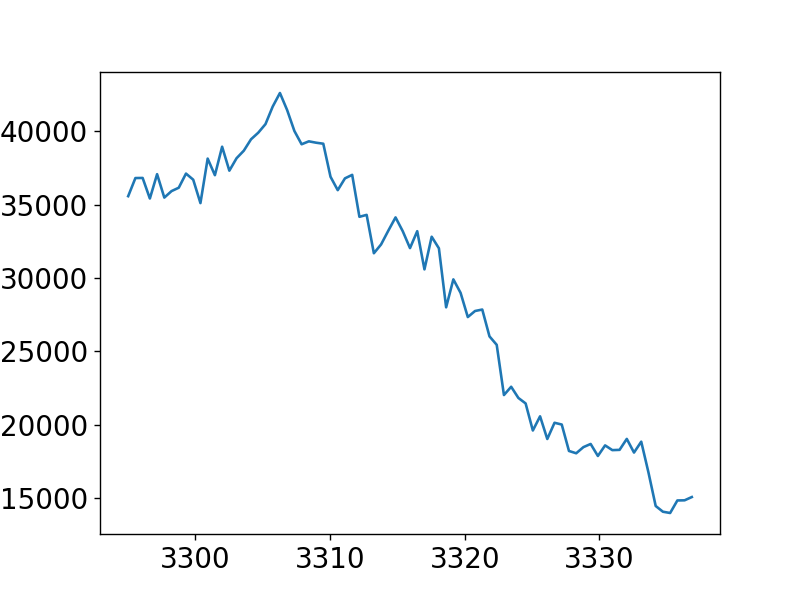

In [8]:
plt.figure(10)
plt.plot(bins[0:-1],izero_filt_and_binned_means)
plt.show()
# plt.plot(bins[0:-1],andor_filt_and_binned_means/np.max(andor_filt_and_binned_means))
# plt.plot(bins[0:-1],andor_filt_and_binned_means/izero_filt_and_binned_means)

<IPython.core.display.Javascript object>


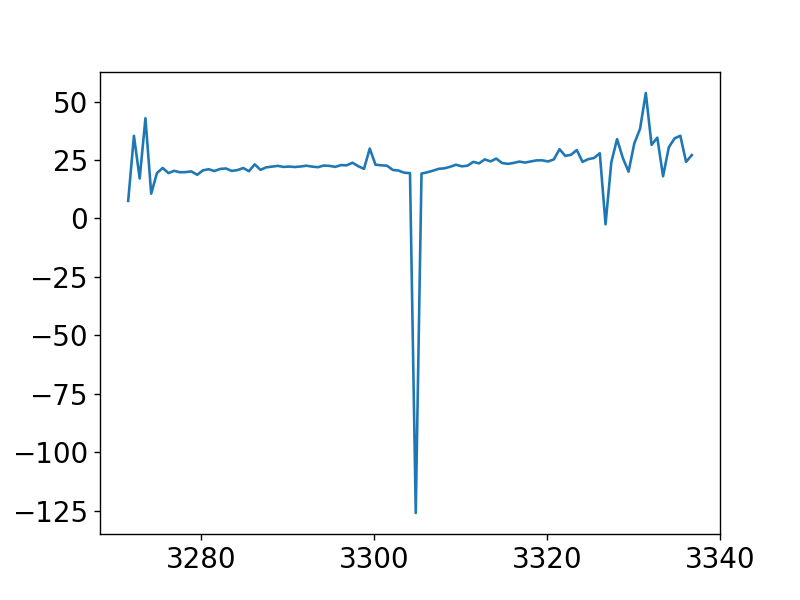

<IPython.core.display.Javascript object>


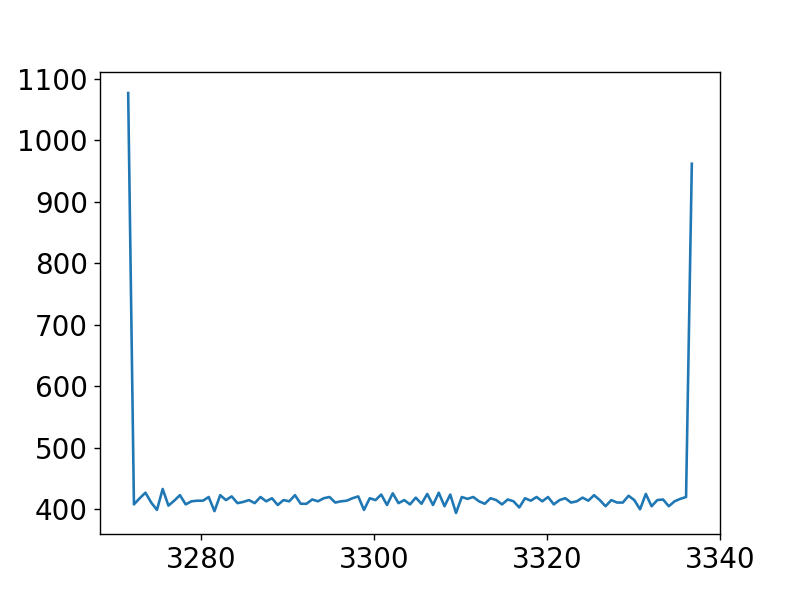

In [9]:
plt.close('all')
# scan = 4
for scan in [0]:
    data = raw_datas[0]
#     cond = bounds_params[scan].condition
    norm_by = raw_datas[scan].I0_intensities_fim1[7,:]
    all_fims = np.sum(raw_datas[scan].I0_intensities_fim1[[4,6,7],:],0)

    y_value = data.andor_dir_intensities/norm_by
#     y_value = norm_by**2

    # y_value = np.mean(data.I0_intensities_fim0[4:7,:],0)
    x_value = data.mono_encoder
    n_bins = 100
    bins,intensity,shots = energy_binning(x_value,y_value,n_bins)
    shots_per_bin = np.asarray([i.shape[0] for i in shots])

    plt.figure(15)
    plt.plot(bins[0:-1],intensity)#/np.max(intensity))
    plt.show()
    plt.figure(16)
    # _, bins, _ = plt.hist(shots)#, 100, label='unfiltered')
    plt.plot(bins[0:-1],shots_per_bin)
    plt.show()